# Distribution of birthdays in Finland

Data from https://www.avoindata.fi/data/en_GB/dataset/syntymapaivien-jakautuminen-kalenterivuodelle

Plot inspiration from: https://stackoverflow.com/a/22568292/7037299

Copyright: Ville Voutilainen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import matplotlib.ticker as ticker

In [2]:
req = requests.get("https://www.avoindata.fi/data/api/3/action/package_show?id=syntymapaivien-jakautuminen-kalenterivuodelle")
df = pd.read_excel(req.json()["result"]["resources"][0]["url"])

In [3]:
df.rename(columns = {"SYNTYMÄKUUKAUSI":"birthmonth", "SYNTYMAPÄIVÄ":"birthday", "LUKUMÄÄRÄ":"count"}, inplace = True)
# Fake date axis for a given year (unimportant which, but needs to be a leap year, say 2020)
df['birthdate'] = pd.to_datetime("2020-" + df['birthmonth'].astype("str") + "-" + df['birthday'].astype("str"))
max_val = df["count"].max()
min_val = df["count"].min()
print("Maximum value is {} at {}".format(max_val, pd.to_datetime(df.loc[df["count"]==max_val, "birthdate"].values[0]).strftime("%B %d")))
print("Minimum value is {} at {}".format(min_val, pd.to_datetime(df.loc[df["count"]==min_val, "birthdate"].values[0]).strftime("%B %d")))
print("Sum of count is {:,.0f}".format(df["count"].sum()))

Maximum value is 26781 at January 01
Minimum value is 4274 at February 29
Sum of count is 6,425,572


In [4]:
df.head()

birthmonth  birthday  count  birthdate
0           1         1  26781 2020-01-01
1           1         2  17274 2020-01-02
2           1         3  17490 2020-01-03
3           1         4  17287 2020-01-04
4           1         5  17664 2020-01-05

In [5]:
# Some plot prep
bottom = 3000
N = df["birthdate"].count()
width = (2*np.pi) / N
max_height = df['count'].max()
df["radii"] = df["count"] - bottom
df.index = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
xlabels = [
    "2020-01-01",
    "2020-02-01",
    "2020-03-01",
    "2020-04-01",
    "2020-05-01",
    "2020-06-01",
    "2020-07-01",
    "2020-08-01",
    "2020-09-01",
    "2020-10-01",
    "2020-11-01",
    "2020-12-01",
]
xticklocs = df[df["birthdate"].isin(xlabels)].index
xlabels = pd.to_datetime(xlabels).strftime("%B")
# Second biggest value for color scale max
max_cscale = df["radii"].sort_values(ascending=False).iloc[1]
# Second smallest value for color scale in
min_cscale = df["radii"].sort_values(ascending=True).iloc[1]

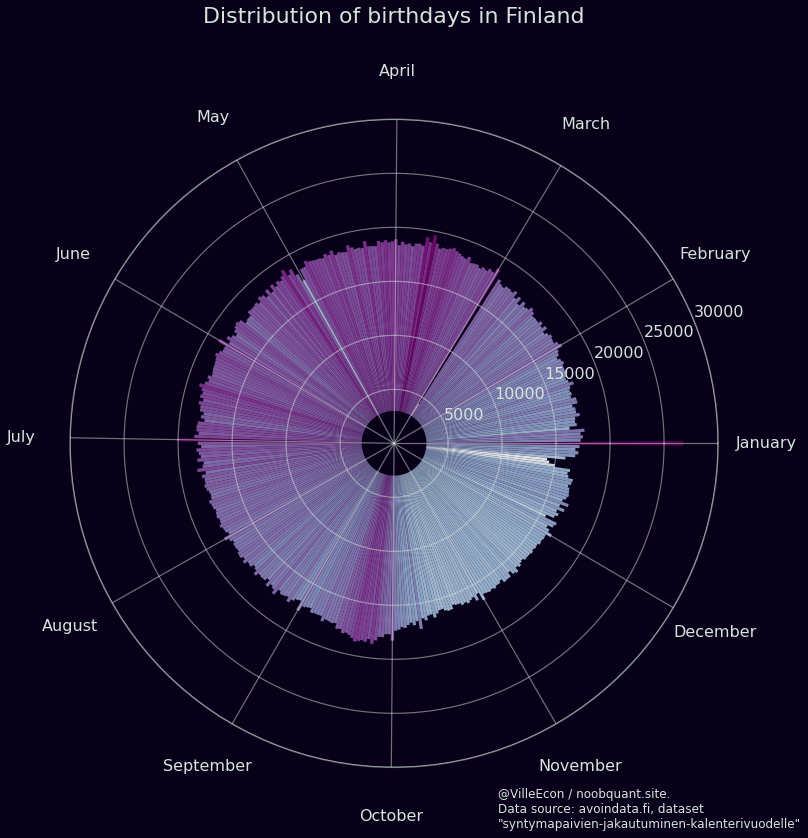

In [6]:
# Plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, polar=True)
bars = ax.bar(df.index, df["radii"], width=width, bottom=bottom)
ax.set_ylim(0, 30000)
ax.xaxis.set_major_locator(ticker.FixedLocator(xticklocs.values))
ax.set_xticklabels(xlabels)
ax.tick_params(axis='x', which='major', labelsize=16, colors="#D7E4DB", pad=38)
ax.tick_params(axis='y', which='major', labelsize=16, colors="#D7E4DB", pad=16)
for crtspine in ['start','polar','end','inner']:
    ax.spines[crtspine].set_linewidth(1.5)
    ax.spines[crtspine].set_color("#D7E4DB")
    ax.spines[crtspine].set_alpha(0.5)    
ax.grid(color='#D7E4DB', linestyle='-', linewidth=1.2, alpha=0.5)    
fig.patch.set_facecolor("#080019")
ax.set_facecolor("#080019")
for r, bar in zip(df["radii"], bars):
    cscale_current = (r - min_cscale)/(max_cscale - min_cscale)
    if cscale_current < 0:
        cscale_current = 0.00001
    if cscale_current > 1:
        cscale_current = 0.99999
    bar.set_facecolor(plt.cm.BuPu(cscale_current))
    bar.set_alpha(0.9)
plotadjust = {'left':0.12,'bottom': 0.10,'right':0.88,'top':0.85,'wspace':None,'hspace':None}
fig.subplots_adjust(left = plotadjust['left'], bottom = plotadjust['bottom'],
                    right = plotadjust['right'], top = plotadjust['top'],
                    wspace = plotadjust['wspace'], hspace = plotadjust['hspace'])
mytext = '@VilleEcon / noobquant.site.\nData source: avoindata.fi, dataset\n"syntymapaivien-jakautuminen-kalenterivuodelle"'
_ = fig.text(0.62, 0.03, mytext, fontsize = 12, color="#D7E4DB", transform=plt.gcf().transFigure)
fig.suptitle("Distribution of birthdays in Finland", color="#D7E4DB", fontsize = 22, y=0.98)
#fig.savefig("birthdays.jpg", dpi=300, facecolor = fig.get_facecolor(), edgecolor='none')